In [1]:
import os

# Define paths
base_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/dataset"
images_dir = os.path.join(base_dir, "images")
yolo_dir = os.path.join(base_dir, "yolo_files")

# Get file lists
image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
yolo_files = [f for f in os.listdir(yolo_dir) if f.endswith('.txt') and os.path.isfile(os.path.join(yolo_dir, f))]

# Get base names
image_names = {os.path.splitext(f)[0] for f in image_files}
yolo_names = {os.path.splitext(f)[0] for f in yolo_files}

# Find mismatches
missing_yolo = image_names - yolo_names
missing_images = yolo_names - image_names

# Print results
print(f"Images: {len(image_files)}, YOLO files: {len(yolo_files)}")
print(f"Unique images: {len(image_names)}, Unique YOLO: {len(yolo_names)}")
print(f"Matching pairs: {len(image_names & yolo_names)}")

if missing_yolo:
    print(f"\nImages missing YOLO ({len(missing_yolo)}):")
    print(*sorted(missing_yolo)[:5], sep='\n')
    if len(missing_yolo) > 5: print(f"... {len(missing_yolo)-5} more")

if missing_images:
    print(f"\nYOLO missing images ({len(missing_images)}):")
    print(*sorted(missing_images)[:5], sep='\n')
    if len(missing_images) > 5: print(f"... {len(missing_images)-5} more")

if not missing_yolo and not missing_images:
    print("\nPerfect match - all files correspond")

Images: 6656, YOLO files: 6656
Unique images: 6656, Unique YOLO: 6656
Matching pairs: 6656

Perfect match - all files correspond


In [2]:
import os

# Path to YOLO annotation files
yolo_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/dataset/yolo_files"

# Collect all class IDs
unique_classes = set()

for filename in os.listdir(yolo_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(yolo_dir, filename), 'r') as f:
            for line in f:
                if line.strip():  # skip empty lines
                    class_id = line.strip().split()[0]
                    unique_classes.add(int(class_id))

# Print results
print(f"Total unique classes: {len(unique_classes)}")
print("Class IDs:", sorted(unique_classes))

Total unique classes: 15
Class IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


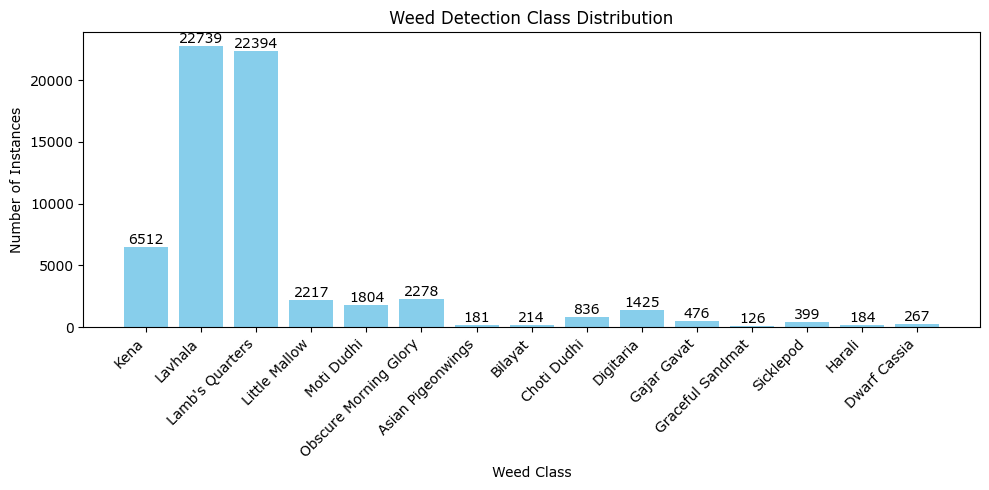

In [3]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Configuration
yolo_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/dataset/yolo_files"
class_names = {
    0: "Kena",
    1: "Lavhala", 
    2: "Lamb's Quarters",
    3: "Little Mallow",
    4: "Moti Dudhi",
    5: "Obscure Morning Glory",
    6: "Asian Pigeonwings",
    7: "Bilayat",
    8: "Choti Dudhi",
    9: "Digitaria",
    10: "Gajar Gavat",
    11: "Graceful Sandmat",
    12: "Sicklepod",
    13: "Harali",
    14: "Dwarf Cassia"
}

# Count class occurrences
counts = defaultdict(int)
for file in os.listdir(yolo_dir):
    if file.endswith('.txt'):
        with open(os.path.join(yolo_dir, file)) as f:
            for line in f:
                if line.strip():
                    class_id = int(line.split()[0])
                    counts[class_id] += 1

# Visualization
plt.figure(figsize=(10, 5))
bars = plt.bar([class_names[i] for i in sorted(counts)],
               [counts[i] for i in sorted(counts)],
               color='skyblue')

plt.xlabel('Weed Class')
plt.ylabel('Number of Instances')
plt.title('Weed Detection Class Distribution')
plt.xticks(rotation=45, ha='right')

# Add exact counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
import os
import numpy as np

labels_path = r"G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\dataset\yolo_files"
imgsz = 832  # assumed image size

perimeters = []

for file_name in os.listdir(labels_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(labels_path, file_name), "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    _, _, _, w_rel, h_rel = map(float, parts)
                    w = w_rel * imgsz
                    h = h_rel * imgsz
                    perimeter = 2 * (w + h)
                    perimeters.append(perimeter)

print("Number of boxes:", len(perimeters))
print("Average perimeter:", np.mean(perimeters))
print("Median perimeter:", np.median(perimeters))
print("Min perimeter:", np.min(perimeters))
print("Max perimeter:", np.max(perimeters))

Number of boxes: 62052
Average perimeter: 502.08274816104057
Median perimeter: 350.95185185185187
Min perimeter: 5.2
Max perimeter: 2780.1703703703706


In [17]:
import os
from pathlib import Path
import shutil

# Path to original dataset
base_path = Path("G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/dataset")
images_dir = base_path / "images"
labels_dir = base_path / "labels"

# New dataset folder
new_base_path = base_path.parent / "new_dataset"
new_images_dir = new_base_path / "images"
new_labels_dir = new_base_path / "labels"

# Create new folders
new_images_dir.mkdir(parents=True, exist_ok=True)
new_labels_dir.mkdir(parents=True, exist_ok=True)

# Classes to keep and remap: old_id -> new_id
class_id_map = {
    0: 0,    # Kena
    2: 1,    # Lamb's Quarters
    3: 2,    # Little Mallow
    4: 3,    # Moti Dudhi
    7: 4,    # Bilayat
    8: 5,    # Choti Dudhi
    10: 6,   # Gajar Gavat
    14: 7    # Dwarf Cassia
}
image_extensions = {".jpg", ".jpeg", ".png"}

# Process each label file
for label_file in labels_dir.glob("*.txt"):
    with open(label_file, "r") as f:
        lines = f.readlines()

    new_lines = []
    for line in lines:
        parts = line.strip().split()
        old_class_id = int(parts[0])
        if old_class_id in class_id_map:
            new_class_id = class_id_map[old_class_id]
            # Replace old class id with new class id
            parts[0] = str(new_class_id)
            new_lines.append(" ".join(parts) + "\n")

    if new_lines:
        # Save filtered and remapped labels
        new_label_path = new_labels_dir / label_file.name
        with open(new_label_path, "w") as f:
            f.writelines(new_lines)

        # Copy corresponding image if it exists
        base_name = label_file.stem
        for ext in image_extensions:
            image_path = images_dir / f"{base_name}{ext}"
            if image_path.exists():
                shutil.copy(image_path, new_images_dir / image_path.name)
                break

print(f"New dataset prepared at: {new_base_path.as_posix()}")

New dataset prepared at: G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/new_dataset


In [18]:
import os

# Path to YOLO annotation files
yolo_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/new_dataset/labels"

# Collect all class IDs
unique_classes = set()

for filename in os.listdir(yolo_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(yolo_dir, filename), 'r') as f:
            for line in f:
                if line.strip():  # skip empty lines
                    class_id = line.strip().split()[0]
                    unique_classes.add(int(class_id))

# Print results
print(f"Total unique classes: {len(unique_classes)}")
print("Class IDs:", sorted(unique_classes))

Total unique classes: 8
Class IDs: [0, 1, 2, 3, 4, 5, 6, 7]


In [19]:
import os
import numpy as np

labels_path = r"G:\AgriTech\agri_projects\3-Weed_Detection\Weed-Detection\v11\new_dataset\labels"
imgsz = 832  # assumed image size

perimeters = []

for file_name in os.listdir(labels_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(labels_path, file_name), "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    _, _, _, w_rel, h_rel = map(float, parts)
                    w = w_rel * imgsz
                    h = h_rel * imgsz
                    perimeter = 2 * (w + h)
                    perimeters.append(perimeter)

print("Number of boxes:", len(perimeters))
print("Average perimeter:", np.mean(perimeters))
print("Median perimeter:", np.median(perimeters))
print("Min perimeter:", np.min(perimeters))
print("Max perimeter:", np.max(perimeters))

Number of boxes: 34720
Average perimeter: 308.3117159498208
Median perimeter: 225.9111111111111
Min perimeter: 10.014814814814816
Max perimeter: 2658.162962962963


In [20]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Paths - VERIFY THESE ARE CORRECT
base_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/new_dataset"
image_dir = os.path.join(base_dir, "images")
yolo_dir = os.path.join(base_dir, "labels")

# Get all valid image files (with extensions)
image_files = [f for f in os.listdir(image_dir) 
              if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
              
print(f"Found {len(image_files)} image files")

if not image_files:
    raise ValueError("No image files found! Check your image directory path.")

# Get base filenames without extensions
all_files = [os.path.splitext(f)[0] for f in image_files]
all_files = np.array(all_files)

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# First split: train vs temp (val+test)
train_files, temp_files = train_test_split(
    all_files,
    train_size=train_ratio,
    random_state=42
)

# Second split: val vs test
val_files, test_files = train_test_split(
    temp_files,
    test_size=test_ratio/(val_ratio + test_ratio),
    random_state=42
)

# Create new directory structure
output_dir = os.path.join(base_dir, "split_data")
os.makedirs(output_dir, exist_ok=True)

# Create main subdirectories
for folder in ["images", "labels"]:
    os.makedirs(os.path.join(output_dir, folder), exist_ok=True)
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(output_dir, folder, split), exist_ok=True)

# Copy files to new structure
for split, files in [("train", train_files), ("val", val_files), ("test", test_files)]:
    for file_base in files:
        # Copy image (try different extensions)
        for ext in ['.jpg', '.png', '.jpeg']:
            src_img = os.path.join(image_dir, file_base + ext)
            if os.path.exists(src_img):
                shutil.copy2(
                    src_img,
                    os.path.join(output_dir, "images", split, os.path.basename(src_img)))
                break
                
        # Copy YOLO annotation
        src_label = os.path.join(yolo_dir, file_base + '.txt')
        if os.path.exists(src_label):
            shutil.copy2(
                src_label,
                os.path.join(output_dir, "labels", split, file_base + '.txt')
            )

print("\nSplitting completed successfully with new structure!")
print(f"Train samples: {len(train_files)}")
print(f"Validation samples: {len(val_files)}")
print(f"Test samples: {len(test_files)}")

Found 6228 image files

Splitting completed successfully with new structure!
Train samples: 4359
Validation samples: 934
Test samples: 935



CLASS DISTRIBUTION SUMMARY
Class                Train    Val      Test     Total    Train%  Val%    Test%  
Kena                 4534     940      1038     6512       18.7%   17.6%   20.0%
Lamb's Quarters      15503    3475     3416     22394      64.1%   65.2%   65.7%
Little Mallow        1599     325      293      2217        6.6%    6.1%    5.6%
Moti Dudhi           1281     306      217      1804        5.3%    5.7%    4.2%
Bilayat              163      29       22       214         0.7%    0.5%    0.4%
Choti Dudhi          597      129      110      836         2.5%    2.4%    2.1%
Gajar Gavat          336      75       65       476         1.4%    1.4%    1.2%
Dwarf Cassia         178      49       40       267         0.7%    0.9%    0.8%


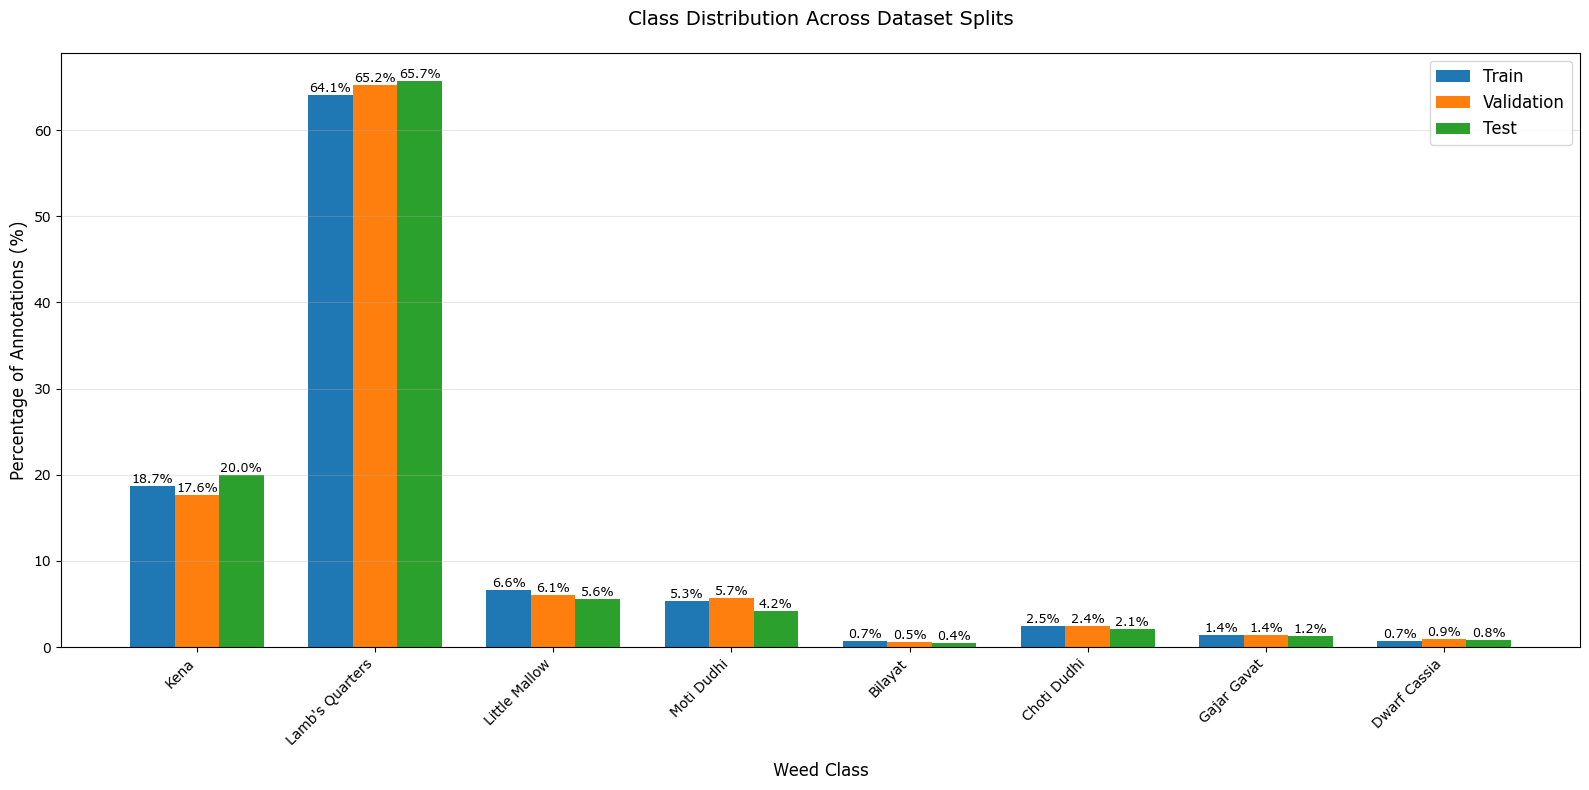

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Configuration - UPDATE THESE PATHS
base_dir = "G:/AgriTech/agri_projects/3-Weed_Detection/Weed-Detection/v11/new_dataset"
output_dir = os.path.join(base_dir, "split_data")

# Class names mapping
class_names = {
    0: "Kena", 1: "Lamb's Quarters",
    2: "Little Mallow", 3: "Moti Dudhi", 4: "Bilayat", 5: "Choti Dudhi",
    6: "Gajar Gavat", 7: "Dwarf Cassia"
}

def count_classes(split_name):
    """Count class occurrences in a split directory"""
    counts = defaultdict(int)
    label_dir = os.path.join(output_dir, "labels", split_name)
    
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    if line.strip():
                        class_id = int(line.split()[0])
                        counts[class_id] += 1
    return counts

# Get counts for each split
train_counts = count_classes("train")
val_counts = count_classes("val")
test_counts = count_classes("test")

# Prepare data for plotting
all_classes = sorted(class_names.keys())
train_values = [train_counts.get(cls, 0) for cls in all_classes]
val_values = [val_counts.get(cls, 0) for cls in all_classes]
test_values = [test_counts.get(cls, 0) for cls in all_classes]

# Calculate percentages
total_train = sum(train_values) or 1  # Avoid division by zero
total_val = sum(val_values) or 1
total_test = sum(test_values) or 1

train_perc = [v/total_train*100 for v in train_values]
val_perc = [v/total_val*100 for v in val_values]
test_perc = [v/total_test*100 for v in test_values]

# Create visualization
plt.figure(figsize=(16, 8))
x = np.arange(len(all_classes))
width = 0.25

# Plot bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
bars1 = plt.bar(x - width, train_perc, width, label='Train', color=colors[0])
bars2 = plt.bar(x, val_perc, width, label='Validation', color=colors[1])
bars3 = plt.bar(x + width, test_perc, width, label='Test', color=colors[2])

# Style the plot
plt.xlabel('Weed Class', fontsize=12, labelpad=10)
plt.ylabel('Percentage of Annotations (%)', fontsize=12)
plt.title('Class Distribution Across Dataset Splits', fontsize=14, pad=20)
plt.xticks(x, [class_names[cls] for cls in all_classes], 
           rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Print numerical summary
print("\nCLASS DISTRIBUTION SUMMARY")
print("="*40)
print(f"{'Class':<20} {'Train':<8} {'Val':<8} {'Test':<8} {'Total':<8} {'Train%':<7} {'Val%':<7} {'Test%':<7}")
for cls in all_classes:
    total = train_counts.get(cls,0) + val_counts.get(cls,0) + test_counts.get(cls,0)
    print(f"{class_names[cls]:<20} "
          f"{train_counts.get(cls,0):<8} "
          f"{val_counts.get(cls,0):<8} "
          f"{test_counts.get(cls,0):<8} "
          f"{total:<8} "
          f"{train_counts.get(cls,0)/total_train*100:6.1f}% "
          f"{val_counts.get(cls,0)/total_val*100:6.1f}% "
          f"{test_counts.get(cls,0)/total_test*100:6.1f}%")

plt.show()